In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#
from scipy.integrate import solve_ivp,cumtrapz

## Relativistic Oscillator ##

Consider the relativistic oscillator discussed in class with
$$
  L = -m\sqrt{1-v^2} - \frac{1}{2}kx^2
$$
We looked at the amplitude-period relation of this oscillator and its relation to special functions, but now let us consider the time evolution.

The Euler-Lagrange equations give
$$
  \frac{d}{dt}\left[\gamma v\right] = -\frac{k}{m}\ x
  \quad\mathrm\quad
  \frac{dx}{dt} = v
$$
Writing $\eta=\gamma v=v/\sqrt{1-v^2}$, which lies in $(-\infty,\infty)$ if $v\in (-1,1)$ we have
$$
\frac{dx}{dt} = \frac{\eta}{\sqrt{1+\eta^2}}
\quad , \quad
\frac{d\eta}{dt} = -\frac{k}{m}\ x
$$
The non-relativistic limit is $|\eta|\ll 1$ where $\eta\approx v$, but we can now study arbitrary amplitude, relativistic motion numerically.  Since we'll use it later let's note that
$$
  v = \frac{\eta}{\sqrt{1+\eta^2}}
  \quad , \quad
  \gamma = \sqrt{1+\eta^2}
$$

In [9]:
# Let's choose our length and time units so that k=m=1:
k,m = 1.0,1.0

In [10]:
def derivs(t,y):
    """Returns the rhs of the ODEs.  Variables are y=[x,eta]."""
    dy   = np.zeros_like(y)
    vv   = y[1] / np.sqrt(1+y[1]**2)
    dy[0]= vv
    dy[1]= -k/m*y[0]
    return(dy)

Text(0, 0.5, '$y$')

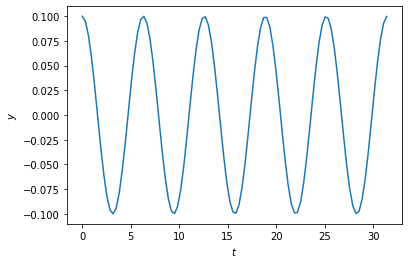

In [11]:
# Let us start at v=0, x=b and think about varying b.
b = 0.1
#
tout= np.linspace(0,31.4,100)
ret = solve_ivp(derivs,(0.0,31.4),[b,0.0],t_eval=tout)
#
# Now plot the solution.
#
fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(ret.t,ret.y[0,:])
ax.set_xlabel('$t$')
ax.set_ylabel('$y$')

Text(0, 0.5, '$y/b$')

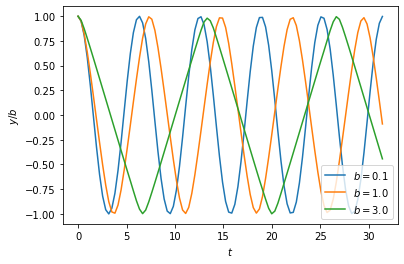

In [12]:
# Let's look at a bunch of different b's together.
fig,ax = plt.subplots(1,1,figsize=(6,4))
tout= np.linspace(0,31.4,100)
#
for b in [0.1,1.0,3.0]:
    ret = solve_ivp(derivs,(0.0,31.4),[b,0.0],t_eval=tout)
    ax.plot(ret.t,ret.y[0,:]/b,label="$b={:.1f}$".format(b))
ax.legend()
ax.set_xlabel('$t$')
ax.set_ylabel('$y/b$')

Note how anharmonic the oscillator is at large values of $b$ (recall I've set $k=m=1$, so $b$ is basically how large the potential energy is in units of the rest-mass energy).

Given the oscillator motion we can now figure out a number of things.  Let's start with the proper time, i.e. the time measured by a clock fixed to the oscillator.

Recall
$$
  \tau = \int \sqrt{ds^2} = \int dt\sqrt{1-v^2} = \int\frac{dt}{\gamma}
$$
so we simply have to integrate $1/\gamma$ given our solution.  We have $\gamma(\eta)$ above, so...

Text(0, 0.5, '$\\tau$')

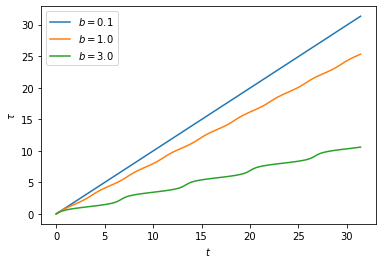

In [15]:
# Plot proper time.
fig,ax = plt.subplots(1,1,figsize=(6,4))
tout= np.linspace(0,31.4,100)
#
for b in [0.1,1.0,3.0]:
    ret = solve_ivp(derivs,(0.0,31.4),[b,0.0],t_eval=tout)
    eta = ret.y[1,:]
    gam = np.sqrt(1+eta**2)
    tau = cumtrapz(1.0/gam,x=ret.t,initial=0)
    ax.plot(ret.t,tau,label="$b={:.1f}$".format(b))
ax.legend()
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$\tau$')

So the highly relativistic oscillator's clock is ticking much more slowly -- as expected!

Finally let's imagine we have a radiation source attached to the oscillator, and let's compute the Doppler shift of emitted radiation.  If the radiation is propagating in the $+x$ direction to the observer then
$$
  \nu_{\rm obs} = \nu_{\rm em}\sqrt{\frac{1+v}{1-v}}
$$

Text(0, 0.5, '$\\nu/\\nu_0$')

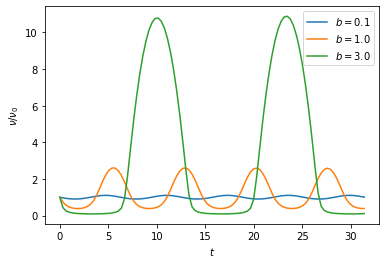

In [16]:
# Plot Doppler factor:
fig,ax = plt.subplots(1,1,figsize=(6,4))
tout= np.linspace(0,31.4,100)
#
for b in [0.1,1.0,3.0]:
    ret = solve_ivp(derivs,(0.0,31.4),[b,0.0],t_eval=tout)
    eta = ret.y[1,:]
    vv  = eta / np.sqrt(1+eta**2)
    dop = np.sqrt( (1+vv)/(1-vv) )
    ax.plot(ret.t,dop,label="$b={:.1f}$".format(b))
ax.legend()
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$\nu/\nu_0$')